# How to Develop an Ensemble of Deep Learning Models in Keras

Source - https://machinelearningmastery.com/model-averaging-ensemble-for-deep-learning-neural-networks/

Deep learning models is so flexible and capable that they can almost solve any complex real world problem given enough resources. The downside of this flexibility is that they suffer from high variance. This means that the models are highly dependent on the training data and the initial random weights. It results in different predictions each time we run the model.

__Solution__:<br/>
It can be addressed by running the model multiple times and combining the predictions. This is called as __Ensemble learning__.
- Combining results can be averaging or max voting, etc.
- For regression, we can average
- For classification, we can max vote

To demonstrate this, we create a problem of our own. As shown below we create a random pool of values of 3 classes.
- 500 samples of x y in 3 classes

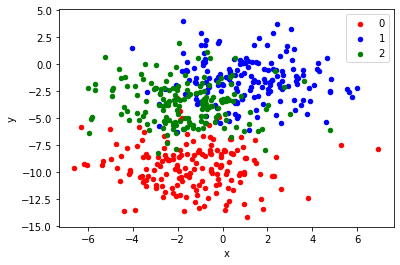

In [1]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [2]:
df.head()

,x,y,label
0,2.668481,-1.556917,1
1,-5.229149,0.679996,2
2,1.623802,2.438864,1
3,-2.814393,-3.689833,1
4,-2.065291,-0.257294,2


In [3]:
X

array([[ 2.66848115e+00, -1.55691695e+00],
       [-5.22914887e+00,  6.79996297e-01],
       [ 1.62380172e+00,  2.43886426e+00],
       [-2.81439273e+00, -3.68983290e+00],
       [-2.06529074e+00, -2.57293575e-01],
       [-5.65337767e-02, -2.47316951e+00],
       [ 1.76074040e-01, -3.09553120e+00],
       [-3.05270019e+00, -2.27325946e+00],
       [-4.86041122e+00, -2.21351497e+00],
       [-1.73659707e+00, -1.36206999e+01],
       [ 2.26397707e+00,  2.91090639e+00],
       [ 2.55928973e+00, -2.10767824e+00],
       [-1.94635574e+00,  1.96598489e+00],
       [-8.04610982e-02, -8.38270643e+00],
       [-1.56586421e+00,  1.71747879e-01],
       [-3.39600639e+00, -1.12994906e+01],
       [-2.42286517e+00, -8.89661123e+00],
       [-8.78488271e-01,  1.77268775e-01],
       [ 3.84318363e+00, -2.18726794e+00],
       [-7.58025512e-01, -3.68813775e+00],
       [-2.32253558e-01, -4.08043618e+00],
       [ 3.17096649e+00,  1.37707136e+00],
       [-3.18500675e+00, -1.73154651e+00],
       [-2.

In [4]:
y

array([1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0,
       1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2,
       0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0,

In [5]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Train: 0.860, Test: 0.803


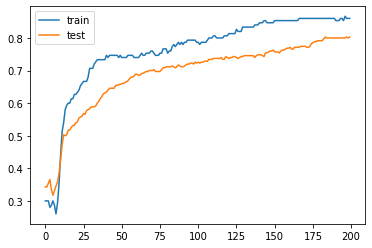

In [6]:
# fit high variance mlp on blobs classification problem
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)

# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

As we know and stated in the very beginning, each time we run the model, we get different training accuracy and testing accuarcy. So, what we do is run the model several times and take the average. We take the standard deviation of the accurcay of the model on the validate dataset as an estimate of the variance of the predictions made by the model.

> 0.769
> 0.809
> 0.771
> 0.751
> 0.766
> 0.766
> 0.783
> 0.774
> 0.763
> 0.769
> 0.771
> 0.777
> 0.760
> 0.780
> 0.754
> 0.769
> 0.780
> 0.757
> 0.777
> 0.757
> 0.777
> 0.711
> 0.737
> 0.706
> 0.771
> 0.757
> 0.780
> 0.746
> 0.729
> 0.771
Scores Mean: 0.763, Standard Deviation: 0.021


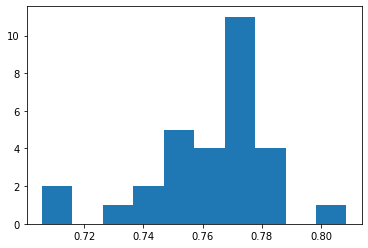

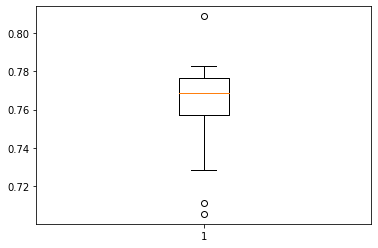

In [7]:
# demonstrate high variance of mlp model on blobs classification problem

from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot

# fit and evaluate a neural net model on the dataset
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
    
	# evaluate the model
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return test_acc

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)

# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# repeated evaluation
n_repeats = 30
scores = list()
for _ in range(n_repeats):
	score = evaluate_model(trainX, trainy, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
    
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

# histogram of distribution
pyplot.hist(scores, bins=10)
pyplot.show()

# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()

On running the program above, we get the __accuracy__ of the model on __test set__ in __each turn__, finishing with the __mean__ and __standard deviation__ of accuracy scores.

In this case, we can see that the average of the sample is 77% with a standard deviation of about 1.4%. Assuming a Gaussian distribution, we would expect 99% of accuracy scores to fall between about 73% and 81% (i.e. 3 standard deviations above and below the mean).

A histogram of the accuracy scores is also created, showing a very rough Gaussian shape, perhaps with a longer right tail. A large sample and a different number of bins on the plot might better expose the true underlying shape of the distribution.

A box and whisker plot is also created showing a line at the median at about 76.5% accuracy on the test set and the interquartile range or middle 50% of the samples between about 78% and 76%.

The analysis of the sample of test scores clearly demonstrates a variance in the performance of the same model trained on the same dataset.

A spread of likely scores of about 8 percentage points (81% – 73%) on the test set could reasonably be considered large, e.g. a high variance result.

Now, let us demonstrate that the Ensemble model viz., average model (in this case) reduces the variance and possibly reduces the generalization error as well.

1
> 0.771
2
> 0.760
3
> 0.769
4
> 0.766
5
> 0.763
6
> 0.751
7
> 0.751
8
> 0.766
9
> 0.763
10
> 0.763
11
> 0.763
12
> 0.763
13
> 0.760
14
> 0.763
15
> 0.760
16
> 0.760
17
> 0.760
18
> 0.763
19
> 0.763
20
> 0.763


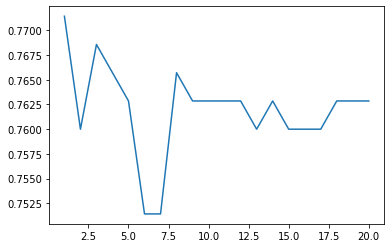

In [9]:
# model averaging ensemble and a study of ensemble size on test accuracy
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model on dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	print(len(subset))
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)

# fit all models
n_members = 20
members = [fit_model(trainX, trainy) for _ in range(n_members)]

# evaluate different numbers of ensembles
scores = list()
for i in range(1, n_members+1):
	score = evaluate_n_members(members, i, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
    
# plot score vs number of ensemble members
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, scores)
pyplot.show()

In [11]:
# repeated evaluation of model averaging ensemble on blobs dataset
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# fit model on dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
    
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result

# evaluate ensemble model
def evaluate_members(members, testX, testy):
	# make prediction
	yhat = ensemble_predictions(members, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)

# repeated evaluation
n_repeats = 30
n_members = 5 ## Get no. of models to try (pick value from x-axis) from above graph where y attains peak performance
scores = list()
for _ in range(n_repeats):
	# fit all models
	members = [fit_model(trainX, trainy) for _ in range(n_members)]
    
	# evaluate ensemble
	score = evaluate_members(members, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

> 0.771
> 0.771
> 0.766
> 0.757
> 0.766
> 0.757
> 0.757
> 0.780
> 0.769
> 0.769
> 0.769
> 0.771
> 0.766
> 0.754
> 0.763
> 0.769
> 0.763
> 0.769
> 0.783
> 0.783
> 0.769
> 0.774
> 0.771
> 0.769
> 0.771
> 0.766
> 0.777
> 0.763
> 0.771
> 0.766
Scores Mean: 0.768, Standard Deviation: 0.007


Clearly it shows, the standard deviation has come down drastically and it shows the model is stable with mean prediction of 76.8% of accuracy.